# Workshop 4: Introduction to Stochastic Methods

A **stochastic** process (also known as a **random** process) is guided by random variables. In stochastic processes, the outcome of a particular event can only be known probabilistically. However, a collection of events exhibits a robust statistical behavior. For example, flipping a balanced coin should produce heads 50% of the time. However, one cannot predict the outcome of a since flip.

In [1]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### Coin Flipping

Let us start by defining a function for flipping coins:

In [37]:
def coin_flip():
    toss = np.random.random()
    if toss > 0.5:
        return "heads"
    else: 
        return "tails"

Now we do some flippin':

In [38]:
nFlips = 10
for i in range(0, nFlips):
    print(coin_flip())

heads
heads
tails
heads
heads
tails
tails
tails
tails
tails


This is nice, but it's not very useful for a large number of flips. Instead, let us define a new ```coin_flip()``` function that returns [1,0] for heads and [0,1] for tails

In [40]:
def coin_flip():
    toss = np.random.random()
    return np.array([1, 0]) if toss > 0.5 else np.array([0, 1])

The new output for the ```coin_flip()``` function might seem a bit weird, but it will make sense shortly. First, we check that the function still works:

In [41]:
nFlips = 10
for i in range(0, nFlips):
    print(coin_flip())

[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]


We can use this output type to keep track of the number of heads and tails in a series of coin flips:

In [44]:
def flips(n):
    count = np.array([[0, 0]] * n)
    for i in range(1, n):
        count[i] = count[i - 1] + coin_flip()
    return count

Now, we perform a series of coin flips and plot the numbers of heads and tails:

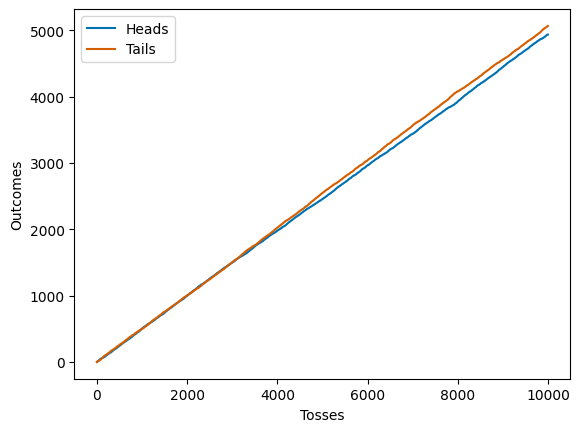

In [81]:
n = 10000

n_flips = list(range(0, n))
res = flips(n)
heads = res[:,0]
tails = res[:,1]

fig, ax = plt.subplots(1, 1)
ax.plot(n_flips, heads, color = CF_blue, label = "Heads")
ax.plot(n_flips, tails, color = CF_vermillion, label = "Tails")
ax.set(xlabel = "Tosses", ylabel = "Outcomes")
ax.legend()

To make the difference between the number of heads and tails more clear, define a function that computes it from ```flips()``` 

In [96]:
def count_diff(n):
    f = flips(n)
    nHeads = f[:,0]
    nTails = f[:,1]
    return (nHeads - nTails)

Now, we can see how the difference changes with the number of flips:

[Text(0.5, 0, 'Tosses'), Text(0, 0.5, 'Heads - Tails')]

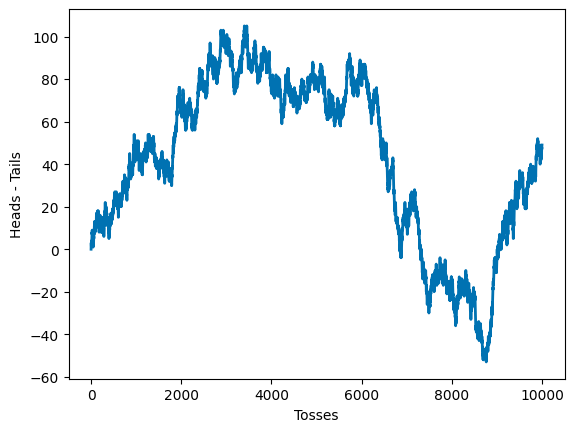

In [98]:
nFlips = 10000

diff = count_diff(nFlips)
flip_count = range(0, nFlips)

fig, ax = plt.subplots(1, 1)
ax.plot(flip_count, diff, color = CF_blue, linewidth = 2)
ax.set(xlabel = "Tosses", ylabel = "Heads - Tails")

Let us plot several realizations on the same axes

[Text(0.5, 0, 'Tosses'), Text(0, 0.5, 'Heads - Tails')]

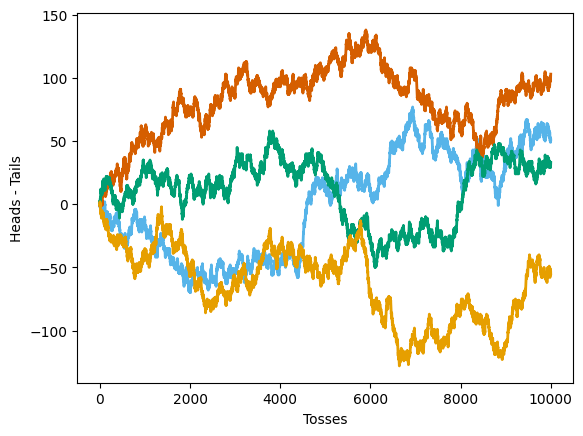

In [107]:
nFlips = 10000

diff_1 = count_diff(nFlips)
diff_2 = count_diff(nFlips)
diff_3 = count_diff(nFlips)
diff_4 = count_diff(nFlips)

flip_count = range(0, nFlips)

fig, ax = plt.subplots(1, 1)
ax.plot(flip_count, diff_1, color = CF_sky, linewidth = 2)
ax.plot(flip_count, diff_2, color = CF_vermillion, linewidth = 2)
ax.plot(flip_count, diff_3, color = CF_green, linewidth = 2)
ax.plot(flip_count, diff_4, color = CF_orange, linewidth = 2)
ax.set(xlabel = "Tosses", ylabel = "Heads - Tails")

We see that the more flips there are, the larger is the excursion of the (Heads $-$ Tails) quantity from zero. How far should we expect it to deviate?

To answer this question, let us define $\Delta\left(n\right) = H\left(n\right) - T\left(n\right)$. 

Its average is given by
$$
\left\langle\Delta\left(n\right)\right\rangle = \left\langle H \left(n\right)\right\rangle - \left\langle T \left(n\right)\right\rangle = np_H - np_T\,,
$$

where $p_H$ and $p_T$ are the probabilities of getting heads or tails. For a fair coin, $p_H = p_T$ so the average is zero, as expected.

To get the deviation from zero, we need the variance:
$$
\sigma^2 = \left\langle \left[\Delta\left(n\right) - \left\langle\Delta\left(n\right)\right\rangle\right]^2 \right\rangle
= \left\langle \Delta^2\left(n\right) + \left\langle\Delta\left(n\right)\right\rangle^2 - 2\Delta\left(n\right)  \left\langle\Delta\left(n\right)\right\rangle\right\rangle = \left\langle \Delta^2\left(n\right)\right\rangle  - \left\langle \Delta \left(n\right)\right\rangle^2\,.
$$

We already know the second term. The first one is:
$$
\left\langle \Delta^2\left(n\right)  \right\rangle = \left\langle \left[H\left(n\right) - T\left(n\right) \right]^2 \right\rangle = \left\langle H^2\left(n\right)+T^2\left(n\right) - 2H\left(n\right)T\left(n\right) \right\rangle 
= \left\langle H^2\left(n\right)\right\rangle + \left\langle T^2\left(n\right) \right\rangle - 2\left\langle H\left(n\right)T\left(n\right) \right\rangle 
\\
= \sum_{j = 0}^n j^2 p_H^j p_T^{n - j} \frac{n!}{j!\left(n - j\right)!}  + \sum_{j = 0}^n j^2 p_T^j p_H^{n - j}\frac{n!}{j!\left(n - j\right)!} - 2 \sum_{j = 0}^n  p_H^j p_T^{n - j}j\left(n - j\right) \frac{n!}{j!\left(n - j\right)!}
\\
=\left( p_H + p_T\right)^{n-2}\left[n^2\left(p_H - p_T\right)^2 + 4 np_H p_T  \right]\,.
$$

If $p_H + p_T = 1$, as expected for a coin, we have
$$
\left\langle \Delta^2\left(n\right)  \right\rangle
=\left[n^2\left(p_H - p_T\right)^2 + 4 np_H p_T  \right]\rightarrow \sigma^2 = 4 np_H p_T\rightarrow \sigma = 2\sqrt{n p_H p_T}\,.
$$

This means that for a fair coin, the standard deviation from the expected value should be close to $\sqrt{n}$.

### Central Limit Theorem

1. Start with defining a function that performs a specified number of flips $n$ with the probability of getting heads $p_H$ and returns $\Delta$.
2. Choose a sufficiently large (play with it) value of $n$ and, for now, set $p_H = 1/2$. Run the function you wrote $N$ times and plot the histogram of the results.
3. What is the fraction of your results that fall within $\pm\sigma$? What about $\pm2\sigma$ and $\pm 3\sigma$? Do these numbers look familiar?

In [108]:
def Delta(n, p_H):
    flips = np.random.random(n)
    res = flips < p_H
    delta = sum(res) - (n - sum(res))
    return delta

Next, we perform multiple realizations to see the distribution of $\Delta$:

Proportion of realizations within 1 sigma: 0.68175
Proportion of realizations within 2 sigma: 0.95075
Proportion of realizations within 3 sigma: 0.99575


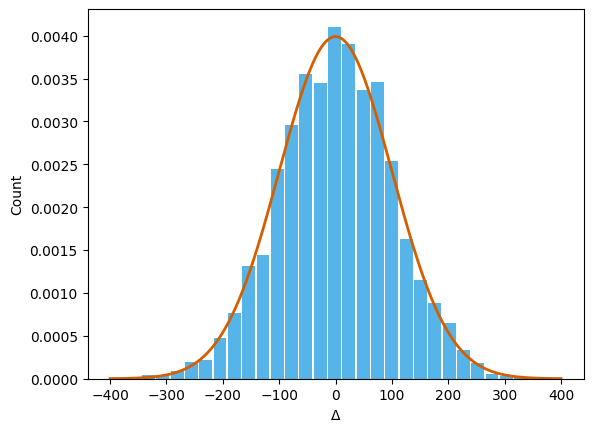

In [121]:
nFlips = 10000 # Number of flips per realization
nReal = 4000 # Number of realizations
p_H = 1/2 # Heads probability

res = np.zeros(nReal)
for i in range(0, nReal):
    res[i] = Delta(nFlips, p_H)

# Curve
nPts = 500
xs = np.linspace(-4 * np.sqrt(nFlips), 4 * np.sqrt(nFlips), nPts)

def curve(x):
    return np.exp(-x ** 2 / (2 * nFlips)) / np.sqrt(2 * np.pi * nFlips)

nCurve = [curve(x) for x in xs]

# Plotting
fig, ax = plt.subplots(1, 1)
ax.hist(res, bins = 30, rwidth = 0.9, color = CF_sky, density = True)
ax.plot(xs, nCurve, color = CF_vermillion, linewidth = 2)
ax.set(xlabel = "$\Delta$", ylabel = "Count")

print("Proportion of realizations within 1 sigma: " + str(sum(abs(res) < 1 * np.sqrt(nFlips)) / nReal))
print("Proportion of realizations within 2 sigma: " + str(sum(abs(res) < 2 * np.sqrt(nFlips)) / nReal))
print("Proportion of realizations within 3 sigma: " + str(sum(abs(res) < 3 * np.sqrt(nFlips)) / nReal))